# 0. What is data science

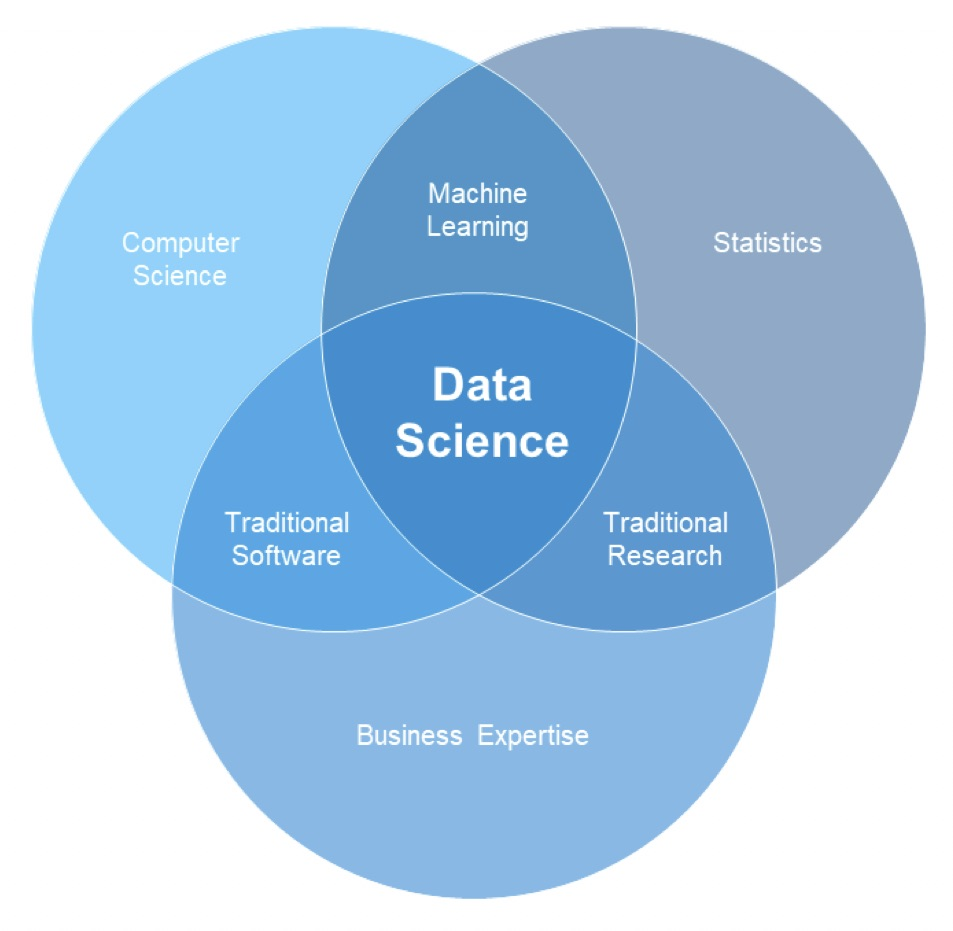

In [2]:
from IPython.display import Image
Image('data-science-venn-diagram.jpg', width=500)

# 1 Numerical computation in Python

## 1.1 Numpy + matplotlib

**Objective**: knows how to create and manipulate arrays in Python

* creating arrays (from list, arange, random)
* indexing + slices
* element-wise operations
* plotting with matplolib
* aggregations: mean/sum

### Installing and importing Python packages

### Create and slice

### Predefined arrays

### Operators on arrays

### Aggregations

**Exercise**:

1) Calculate the sum of all values from 3 to 51 (including 51).

2) Calculate the average of the following numbers: 1, 4, 10, -3. Subtract the average from each number.

## 1.2 Basic example: Linear regression

**Objective**: Understands the concept of statistical estimation

* least square error
* gradient descent
* normal equations?

Exercises:
* implement MSE
* calculate derivatives/gradient

### Create and plot example dataset

### Find linear coefficients

**Problem**: Given the `x` array (also called regressors or independent variable) and `y` array (dependent variable), find the best estimates of the value of linear coefficients `a` and `b`.

### Mean-square error

### Gradient descent

**Exercise**: Calculate gradient of the MSE with respect to the coefficients.

##  1.3 Object oriented programming

**Objective**: can encapsulate concepts in classes

* attributes
* methods
* scikit-learn-like API: fit, transform methods

**Exercises**:

* name methods, attributes
* fill the gaps (function arguments)

**Definition**: Classes are data objects (like lists) that contain data ("attributes") and functions operating on these data ("methods").

### Attributes

### Methods

### Constructor (initializer)

### Implement linear regression class

## Quiz

1) Fill in the gaps

```
class DummyModel:
    """Create a dummy model"""
     
    def _______(self, params): 
        self.params = params  
        
    def summarize(self):       
        """Summarize model""" 
        print("Params: {}".format(params))
        
```

* the variable `self.params` is called an `______` of the class `_____`.

* `self` is an `____` of a class `_____`

* `______` method of a class is called a constructor,

* `______` is an argument of the the constructor,

* `summarize` is called a `______` of a class




2) What will this code do:

```
model = DummyModel()
```

a) Show the value of `self.params`.

b) Show the string "Summarize model"

c) Fit the DummyModel

d) Nothing, it will produce an error.